In [5]:
import sys
sys.path.append('..')
import pandas as pd

## 1.- dabl
dabl ha sido creado por Andreas Mueller e intenta ayudar a que el aprendizaje automático supervisado sea más accesible para los principiantes y reducir la placa de caldera para tareas comunes. Dabl se inspira en scikit-learn y auto-sklearn. Consulte el sitio web oficial para obtener más información.

In [6]:
import dabl

In [8]:
train = pd.read_csv('../data/train.csv')
train.shape

(7613, 5)

In [9]:
train_clean = dabl.clean(train, verbose=1)

Detected feature types:
continuous      1
dirty_float     0
low_card_int    0
categorical     1
date            0
free_string     3
useless         0
dtype: int64


In [14]:
types = dabl.detect_types(train_clean)
print(types) 

          continuous  dirty_float  low_card_int  categorical   date  \
id              True        False         False        False  False   
keyword        False        False         False        False  False   
location       False        False         False        False  False   
text           False        False         False        False  False   
target         False        False         False         True  False   

          free_string  useless  
id              False    False  
keyword          True    False  
location         True    False  
text             True    False  
target          False    False  


Target looks like classification


[[<Figure size 216x216 with 2 Axes>], None]

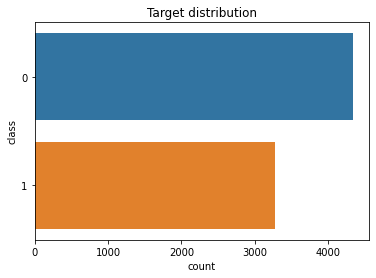

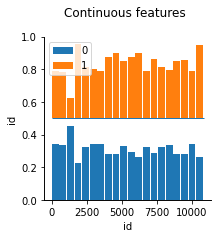

In [15]:
dabl.plot(train, target_col="target")

In [17]:
ec = dabl.SimpleClassifier(random_state=0).fit(train, target_col="target") 

Running DummyClassifier()
accuracy: 0.570 average_precision: 0.430 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.363
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.570 average_precision: 0.430 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.363

Running GaussianNB()
accuracy: 0.570 average_precision: 0.465 roc_auc: 0.536 recall_macro: 0.500 f1_macro: 0.363
Running MultinomialNB()
accuracy: 0.570 average_precision: 0.430 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.363
Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.488 average_precision: 0.450 roc_auc: 0.539 recall_macro: 0.539 f1_macro: 0.441
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.488 average_precision: 0.450 roc_auc: 0.539 recall_macro: 0.539 f1_macro: 0.441

Running DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.534 average_precision: 0.506 roc_auc: 0.590 recall_macro: 0.554 f1_macro: 0.

## 2.- missingno
Los datos en la vida real son desordenados y faltantes, no nos ayuda a lidiar con los valores faltantes en un conjunto de datos con la ayuda de visualizaciones. Con más de 2k estrellas en github, esta biblioteca ya es muy popular.

In [19]:
import missingno as msno

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


<AxesSubplot:>

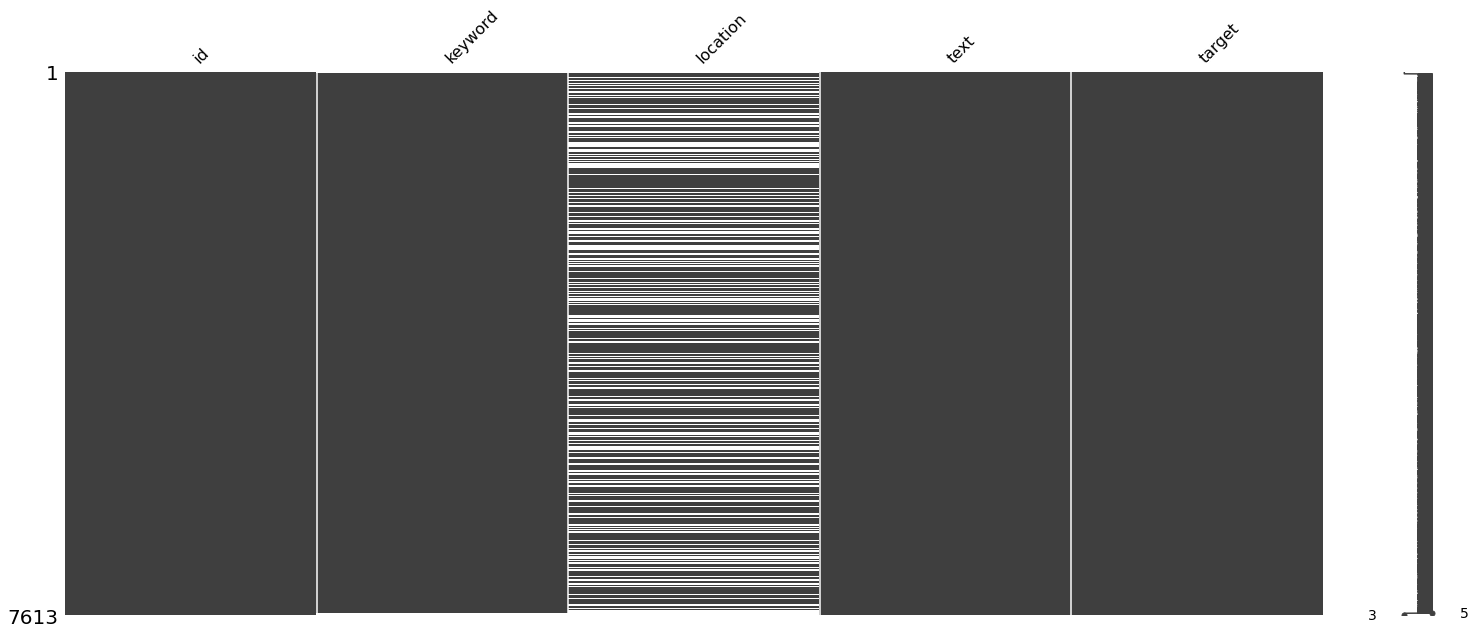

In [21]:
msno.matrix(train)

In [22]:
train.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:>

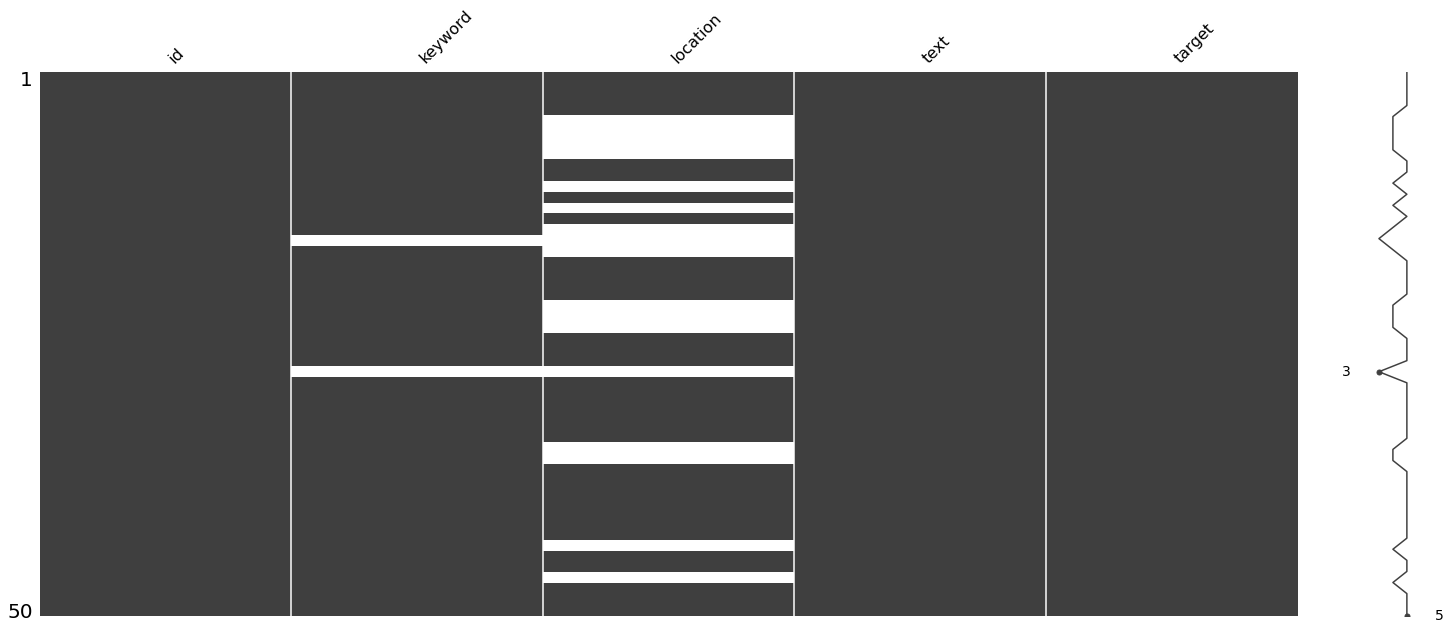

In [27]:
msno.matrix(train.sample(50))

<AxesSubplot:>

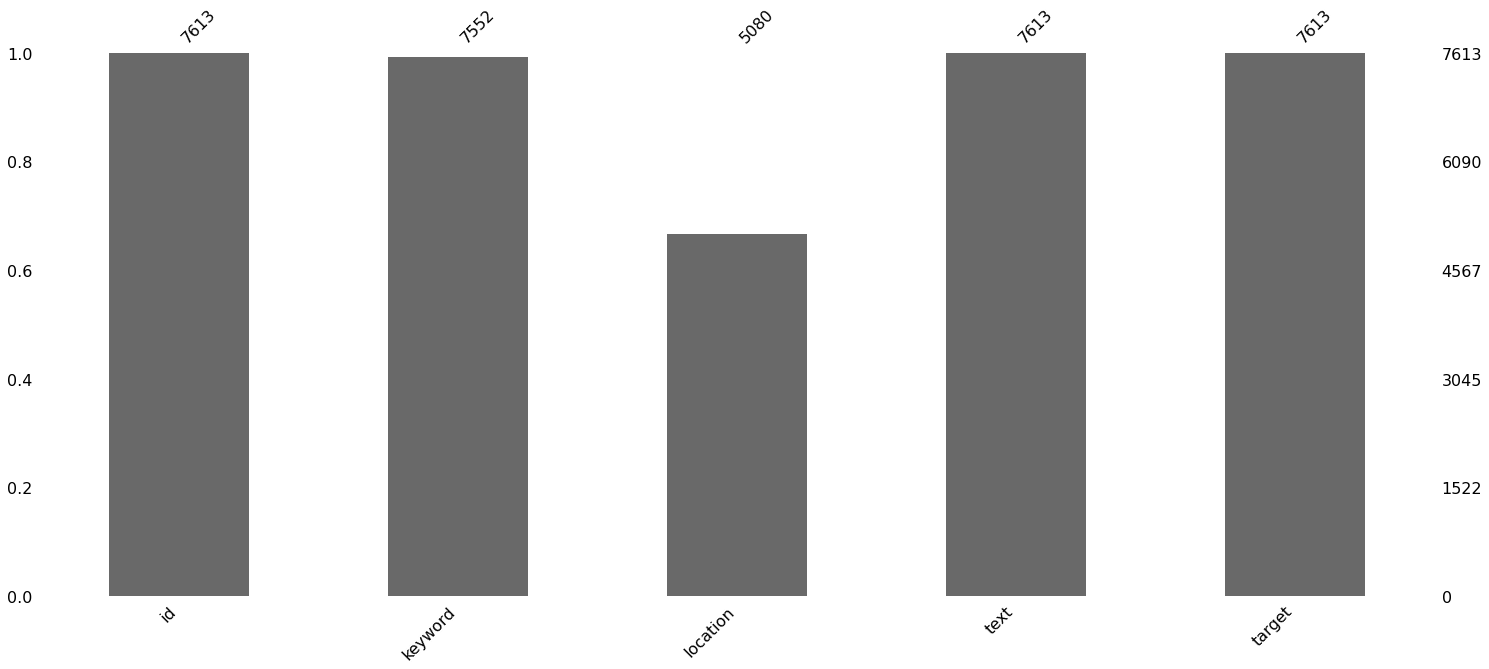

In [28]:
msno.bar(train)

<AxesSubplot:>

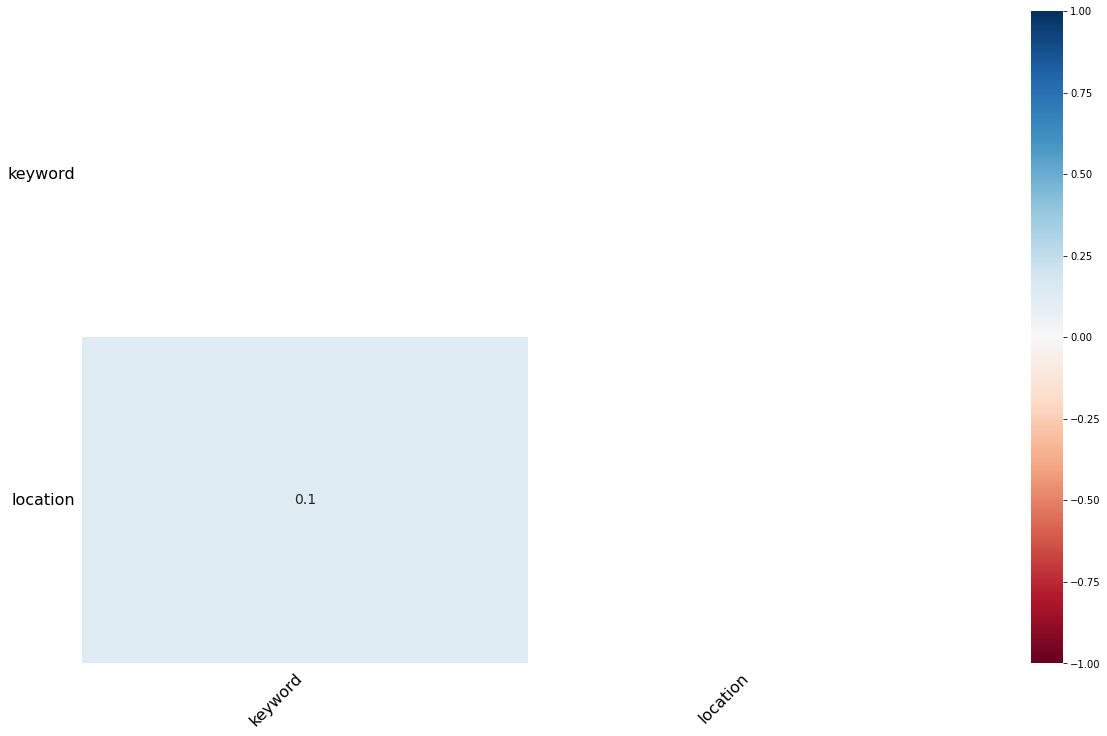

In [29]:
msno.heatmap(train)

## 3.- Flashtext
Flastext le permite extraer palabras clave de una oración o reemplazar palabras clave en oraciones. Se basa en el algoritmo FlashText y es considerablemente más rápido que las expresiones regulares para tareas de NLP.

In [31]:
from flashtext import KeywordProcessor